# AI Community @ Семинар № 6
## Перцептрон, Нейроны и Градиентный спуск: практика.

In [1]:
# !pip install scikit-learn
# !pip install seaborn
# !pip install tqdm

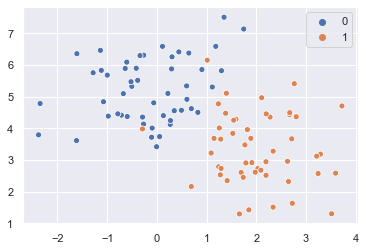

In [2]:
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt  
from sklearn.datasets import make_blobs 
from tqdm.notebook import tqdm

%matplotlib inline
sns.set()
  
# Подготовим данные для классификации
X, y = make_blobs(n_samples = 100, centers = [[0, 5], [2, 3]], 
                  cluster_std = 1, n_features = 2) 

sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

In [3]:
# Инициилизируем класс перцептрон

class Perceptron:
    def __init__(self, num_features):
        self.w = np.random.random((num_features, 1))
        self.b = 1
        
    def forward(self, input_matrix):
        result = (input_matrix @ self.w).sum() + self.b
        return result > 0
    
    def train_on_single_example(self, example, y):
        diff = y - self.forward(example.T)
        self.w += diff * example
        self.b += diff
        return abs(diff)
    
def plot_separation_line(neuron, X, y):
    w, bias = neuron.w, neuron.b
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)
    xx = np.linspace(*plt.xlim())
    plt.plot(xx, a*xx + b, color="black", linewidth=2)

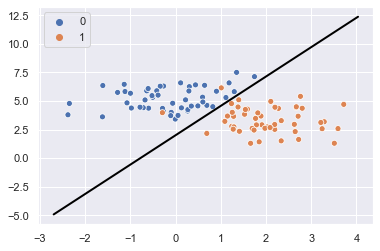

In [4]:
num_steps = int(1e4)
errors = []
perceptron = Perceptron(X.shape[1])

error = 1
for i in tqdm(range(num_steps)):
    error = 0
    for example, answer in zip(X, y):
        example = example.reshape((example.size, 1))
        error += int(perceptron.train_on_single_example(example, answer))
    errors.append(error)
    if error == 0:
        break
        
plot_separation_line(perceptron, X, y)

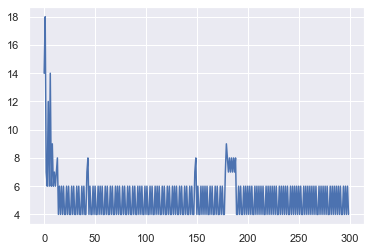

In [5]:
# После определённого шага параметры начнут колебаться возле определённого значения
plt.plot(errors[:300])